In [9]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt


In [10]:
# Generate a synthetic dataset for sales
np.random.seed(42)
dates = pd.date_range(start='2023-01-01', end='2023-12-31', freq='D')
products = ['Laptop', 'Mobile', 'Tablet', 'Headphones', 'Monitor']
categories = ['Electronics', 'Electronics', 'Electronics', 'Accessories', 'Accessories']
cities = ['New York', 'Los Angeles', 'Chicago', 'Houston', 'Phoenix']
data = {
    'Date': np.random.choice(dates, size=500),
    'Product': np.random.choice(products, size=500),
    'Category': np.random.choice(categories, size=500),
    'Sales': np.random.randint(1, 10, size=500),
    'Revenue': np.random.uniform(100, 1000, size=500),
    'City': np.random.choice(cities, size=500)
}

sales_data = pd.DataFrame(data)

In [11]:
# Add a 'Month' column for analysis
sales_data['Month'] = pd.to_datetime(sales_data['Date']).dt.to_period('M')


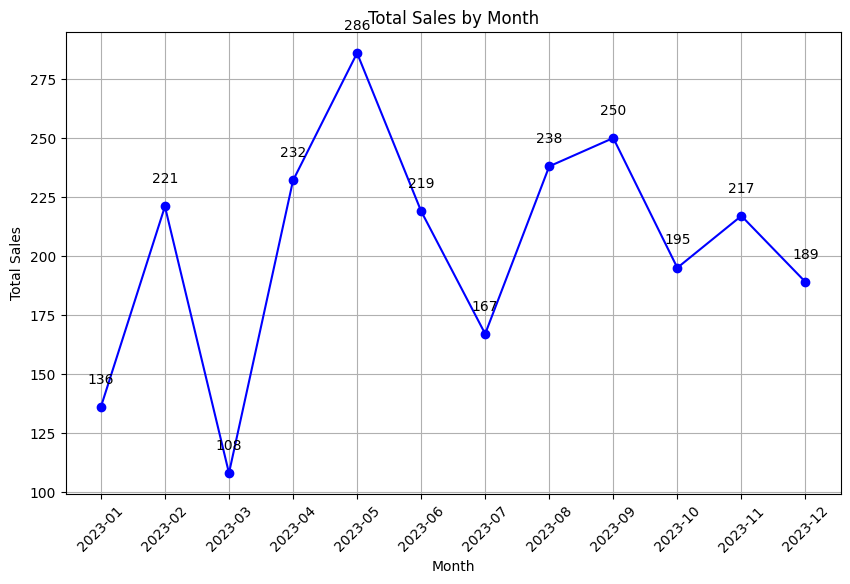

In [12]:
# 1. Total Sales by Month
monthly_sales = sales_data.groupby('Month')['Sales'].sum().reset_index()
plt.figure(figsize=(10, 6))
plt.plot(monthly_sales['Month'].astype(str), monthly_sales['Sales'], marker='o', color='b')
plt.xticks(rotation=45)

for i, value in enumerate(monthly_sales['Sales']):
    plt.text(i, value + 10, str(value), ha='center', fontsize=10)
    
plt.title('Total Sales by Month')
plt.xlabel('Month')
plt.ylabel('Total Sales')
plt.grid(True)
plt.show()

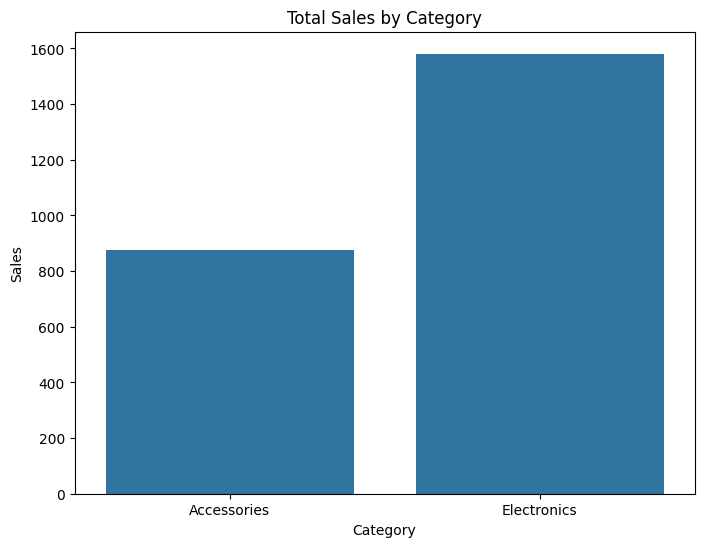

In [13]:
# 2. Sales by Category
category_sales = sales_data.groupby('Category')['Sales'].sum().reset_index()
plt.figure(figsize=(8, 6))
sns.barplot(x='Category', y='Sales', data=category_sales)
plt.title('Total Sales by Category')
plt.show()  

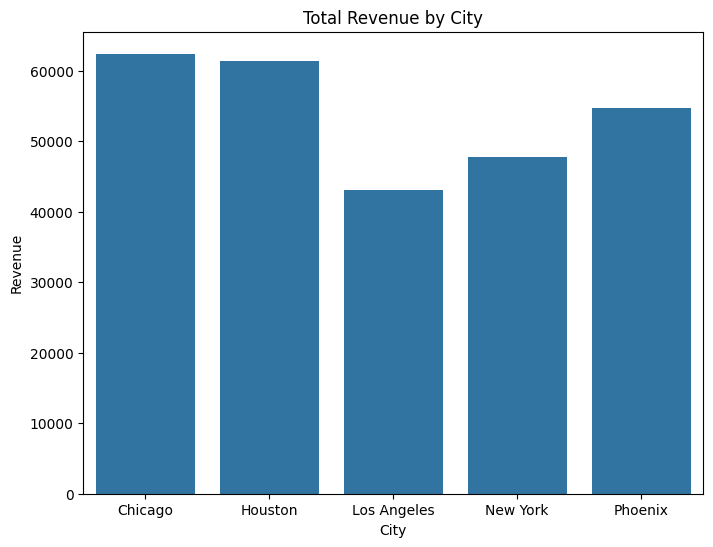

In [8]:
# 3. Revenue by City
city_revenue = sales_data.groupby('City')['Revenue'].sum().reset_index()
plt.figure(figsize=(8, 6))
sns.barplot(x='City', y='Revenue', data=city_revenue)
plt.title('Total Revenue by City')
plt.show()

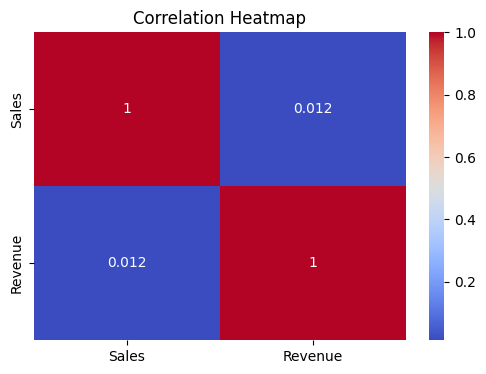

In [9]:
# 4. Correlation Heatmap
corr_matrix = sales_data[['Sales', 'Revenue']].corr()
plt.figure(figsize=(6, 4))
sns.heatmap(corr_matrix, annot=True, cmap='coolwarm')
plt.title('Correlation Heatmap')
plt.show()